<a href="https://colab.research.google.com/github/sbogde/pandamonium/blob/main/dmi_02_loans_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
# ---- Step 1: Load the Dataset ----
if 'google.colab' in str(get_ipython()):
    from google.colab import drive, data_table
    drive.mount('/content/drive', force_remount=True)
    file_path = '/content/drive/My Drive/Colab Notebooks/data-mining/data/train_ctrUa4K.csv'
    data_table.enable_dataframe_formatter()
else:
    file_path = './data/train_ctrUa4K.csv'  # Local path

Mounted at /content/drive


In [3]:
# Load the loan dataset
df = pd.read_csv(file_path)

In [4]:
# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Dataset shape: (614, 13)
Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [6]:
# For numerical columns, fill missing values with the mean
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

# For categorical columns, fill missing values with the mode
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check for remaining missing values
print(df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [7]:
# Option 1: Use LabelEncoder for each categorical column
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Alternatively, with one-hot encoding
# df = pd.get_dummies(df, drop_first=True)

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [8]:
# Drop irrelevant features ('Loan_ID' for example)
if 'Loan_ID' in df.columns:
    df.drop(['Loan_ID'], axis=1, inplace=True)

# Define target and features
target = 'Loan_Status'
X = df.drop(target, axis=1)
y = df[target]

print("Features:", X.columns.tolist())
print("Target:", target)

Features: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
Target: Loan_Status


In [9]:
# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (491, 11)
Test set size: (123, 11)


In [10]:
# Initialize and train a Decision Tree Classifier
tree_clf = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)

print("Decision Tree model trained.")

Decision Tree model trained.


In [11]:
# Use the trained model to predict on the test set
y_pred = tree_clf.predict(X_test)

In [12]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Display the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.7560975609756098
Confusion Matrix:
 [[18 25]
 [ 5 75]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



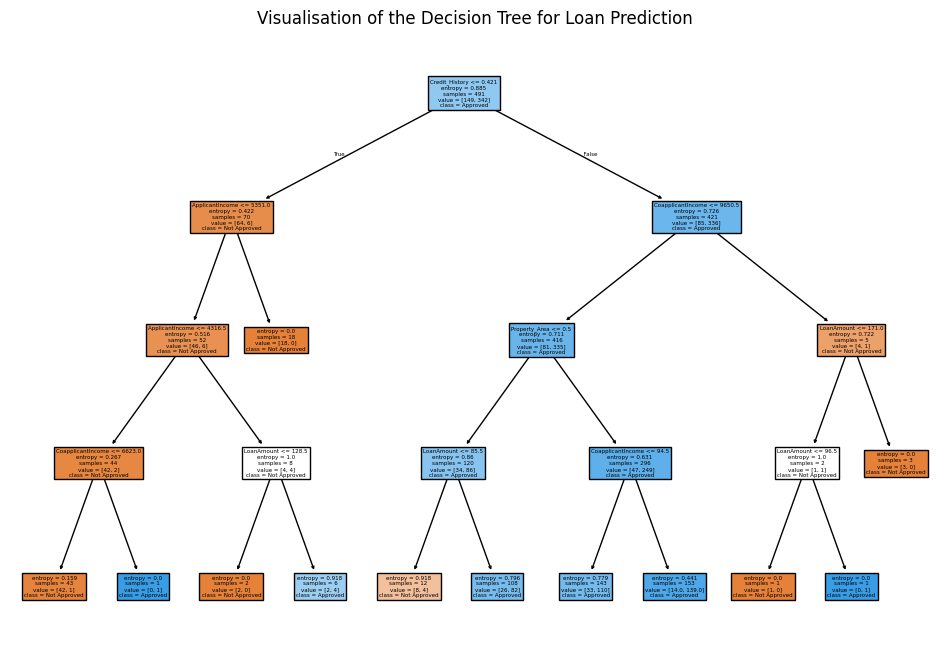

In [13]:
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, feature_names=X.columns, class_names=["Not Approved", "Approved"], filled=True)
plt.title("Visualisation of the Decision Tree for Loan Prediction")
plt.show()
